In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

df = pd.read_csv('day.csv')

Más informacióm del dataset 

El objetivo es predecir cuantas bicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

## Datos

In [2]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df = df.drop(columns = ['casual','registered','instant','dteday','mnth','yr'])

In [4]:
df= pd.get_dummies(df, columns=['season','weekday','weathersit'])
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.363625,0.805833,0.160446,985,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [5]:
target = 'cnt'
y = df[target]
X=df.copy()

## Análisis Bivariado

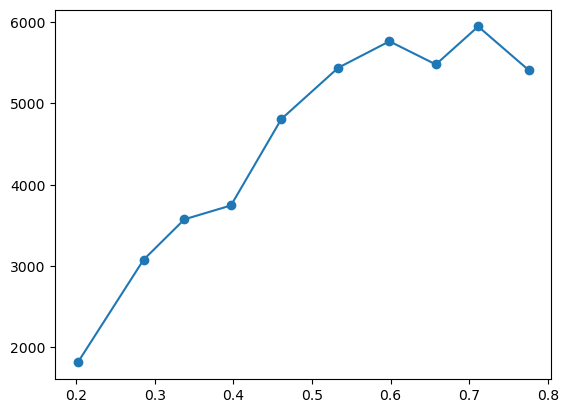

In [6]:
df['temp_bin'] = pd.qcut(df['temp'] , q = 10, labels = False) + 1
grouped_temp = df.groupby('temp_bin').mean(numeric_only = True)
plt.plot(grouped_temp.temp.values, grouped_temp.cnt.values, marker = "o")

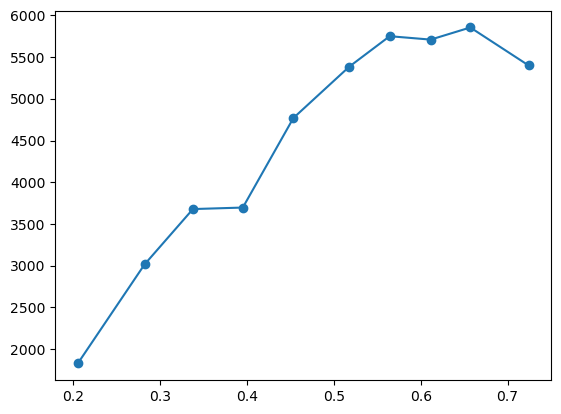

In [7]:
df['atemp_bin'] = pd.qcut(df['atemp'] , q = 10, labels = False) + 1
grouped_atemp = df.groupby('atemp_bin').mean(numeric_only = True)
plt.plot(grouped_atemp.atemp.values, grouped_atemp.cnt.values, marker = "o")

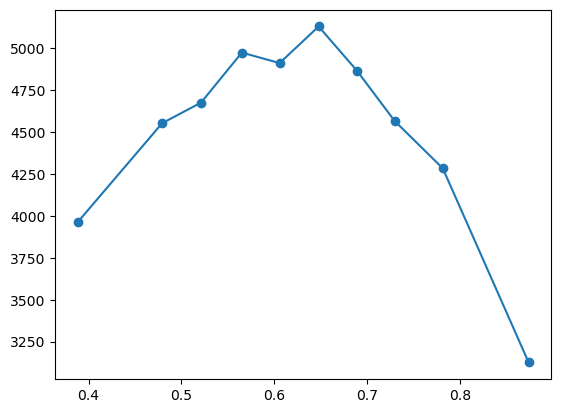

In [8]:
df['hum_bin'] = pd.qcut(df['hum'] , q = 10, labels = False) + 1
grouped_hum = df.groupby('hum_bin').mean(numeric_only = True)
plt.plot(grouped_hum.hum.values, grouped_hum.cnt.values, marker = "o")

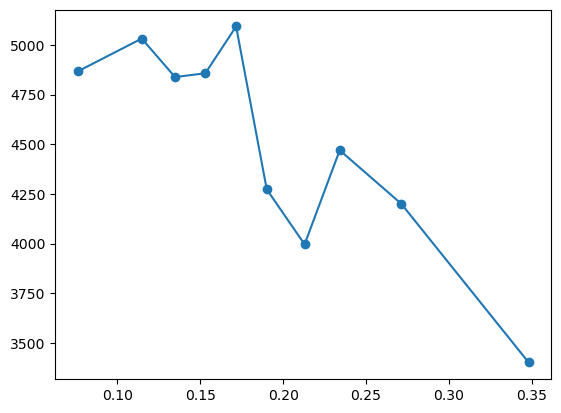

In [9]:
df['windspeed_bin'] = pd.qcut(df['windspeed'] , q = 10, labels = False) + 1
grouped_windspeed = df.groupby('windspeed_bin').mean(numeric_only = True)
plt.plot(grouped_windspeed.windspeed.values, grouped_windspeed.cnt.values, marker = "o")

### Análisis

Tras haber realizado todos los analisis bivariados, podemos observar que no existe una variable númerica que tenga un comportamiento lineal. Podemos observar que las variables de temp y atemp son las más parecidas a un modelo lineal, sin embargo, no se podría decir que son óptimas para un buen modelo de predicción por si solas. Tras ver esto podemos deducir que lo mejor es hacer regresiones lineales multiples para poder tener un mejor módelo de predicción.


## Modelo todas las variables

In [10]:
X = X.drop(target, axis=1)

In [11]:
X

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0.196364,0.189405,0.437273,0.248309,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,1,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,1,0.254167,0.226642,0.652917,0.350133,1,0,0,0,0,0,0,0,1,0,0,0,1,0
727,0,1,0.253333,0.255046,0.590000,0.155471,1,0,0,0,0,0,0,0,0,1,0,0,1,0
728,0,0,0.253333,0.242400,0.752917,0.124383,1,0,0,0,0,0,0,0,0,0,1,0,1,0
729,0,0,0.255833,0.231700,0.483333,0.350754,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [12]:
model_todas = linear_model.LinearRegression()
model_todas.fit(X,y)
predicciones_todas = model_todas.predict(X)
r2_score(y_pred=predicciones_todas,y_true=y)

0.5642465831561199

Tras haber visto que los analisis bivariados no nos daban una buena relación entre las variables numericas y la variable dependiente, decidí hacer un módelo con todas las variables incluyendo las categóricas y las binarias, obteniendo un R2 de 0.56. Sin embargo, se pueden hacer modificaciones con los datos para poder tener un modelo mejor. También se intentará usar la regularización Ridge para ver si el módelo tiene una mejora considerable.

## Modelo Mejorado

In [13]:
X_new = X

In [14]:
X_new['atemp^2']=X_new['atemp']**2
X_new['temp^2']=X_new['temp']**2

In [15]:
X_new['temp_weathersit_1'] = X_new['temp'] * X_new['weathersit_1']
X_new['temp_weathersit_2'] = X_new['temp'] * X_new['weathersit_2']
X_new['temp_weathersit_3'] = X_new['temp'] * X_new['weathersit_3']



#### Explicación variables agregadas

* atemp^2  y temp^2: Como se puede ver en el analisis bivariado, tanto el de temp y atemp son muy parecidos y vemos cómo mientras va subiendo la temperatura va aumenta el numero de biciletas rentadas, sin embrago al llegar al 0.7, se ve como si fuera a bajar el numero, indicandonos que cuando es mucha la temperatura, el número de bicicletas va a bajar, siendo una parabola. El elevar esats dos variables nos ayudaría a captar más este patrón y tener un mejor módelo.

* Temp_weathersit 1, 2 y 3: Al multiplicar la variable de temp con la de weathersit nos puede ayudar a encontrar una relacion entre ambás variables. Dependiendo de si esta soleado, nublado etc., y la temperatura de ese día, se podría evr benficiado o perjudicado la renta de bicicletas, siendo una variable buena para poder predecir el numero de rentas por día.





### Modelo con Regularización Ridge

In [16]:
model = Ridge(alpha=0.1).fit(X_new, y)
r2_ridge = r2_score(y_pred=model.predict(X_new), y_true=y)
r2_ridge

0.6132840319321158

### Modelo sin Regularización Ridge

In [17]:
model_SR = linear_model.LinearRegression()
model_SR.fit(X_new,y)
predicciones_SR = model_SR.predict(X_new)
r2_score(y_pred=predicciones_SR,y_true=y)

0.620872438599392

#### Podemos ver que sin Ridge tenemos un R2 mejor, por lo cual usaremos el módelo sin Ridge para realizar nuestra predicción

In [18]:
coeficientes= pd.DataFrame({
    'names': X_new.keys(),
    'coeficientes': model_SR.coef_
})

coeficientes

,names,coeficientes
0,holiday,-354.868089
1,workingday,198.113414
2,temp,32544.163340
3,atemp,-24409.648989
4,hum,-3267.859414
5,windspeed,-4956.296713
6,season_1,-598.064267
7,season_2,-42.746996
8,season_3,178.014920
9,season_4,462.796343


In [19]:
calibracion = pd.DataFrame({
    'predicciones': predicciones_SR,
    'real': y
})

In [20]:
calibracion['bins']= pd.qcut(calibracion['predicciones'], q=10, labels=False)+1

In [21]:
grouped_calibracion =calibracion.groupby('bins').mean()

In [22]:
grouped_calibracion['error'] = (grouped_calibracion.predicciones- grouped_calibracion.real) / grouped_calibracion.predicciones
grouped_calibracion

,predicciones,real,error
bins,,,
1,1311.762442,1568.513514,-0.195730
2,2722.205301,2514.904110,0.076152
3,3571.816215,3396.917808,0.048966
4,4243.934091,4104.054795,0.032960
5,4737.070402,4732.863014,0.000888
6,5106.356831,4932.835616,0.033981
7,5402.998409,5539.356164,-0.025237
8,5689.236781,5677.465753,0.002069
9,5938.799239,6144.219178,-0.034589


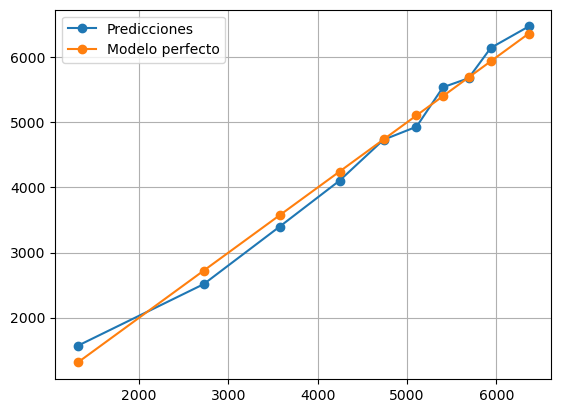

In [23]:
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.real.values, marker='o', label = 'Predicciones')
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.predicciones.values, marker='o', label = 'Modelo perfecto')
plt.legend()
plt.grid()

Podemos ver como nuestra linea de predicciones es muy parecida a la linea de los valores reales. Podemos observar como el primer bin es donde hay más error con un 19%, pero conforme avanza la linea, esta se va ajustando más a la real, tenendo unos errores muy bajos y obtenindo grandes predicciones con nuestro módelo el cual tiene un R2 de 0.6208, el cual os indica que en un buen modelo.